In [4]:
pip install catboost

     |████████████████████████████████| 11.1 MB 232 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [273]:
import numpy as np
from catboost import Pool, CatBoostRegressor

import numpy as np
import pandas as pd

Data import and prepairing

In [274]:
df = pd.read_csv('train.csv')

df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode())
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode())
df['Functional'] = df['Functional'].fillna(df['Functional'].mode())
df['GarageYrBlt'] = df['GarageYrBlt'].dropna()
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode())

df = df.fillna('None')

X = df.iloc[:,1:80]
Y = df['SalePrice']

X = pd.get_dummies(data=X, drop_first=True)

Data split into train and test samples

In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

For comparison I'll build 2 models –  Gradient Boosting Model ana Linear Model. To decide which model is better, will be used metrics such like Root Mean Square Error as the most popular metric foe model evaluating.

Gradient Boosting model

In [368]:
train_pool = Pool(X_train, 
                  y_train )
test_pool = Pool(X_test)

model = CatBoostRegressor(iterations=50, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE')
#train the model
model.fit(train_pool)

0:	learn: 57677.7355289	total: 3.49ms	remaining: 171ms
1:	learn: 49083.9475661	total: 7.36ms	remaining: 177ms
2:	learn: 47795.1122395	total: 12.8ms	remaining: 201ms
3:	learn: 42577.2813820	total: 16.8ms	remaining: 193ms
4:	learn: 39440.9925217	total: 36.1ms	remaining: 325ms
5:	learn: 38335.5764017	total: 39.9ms	remaining: 292ms
6:	learn: 36318.6075051	total: 44.2ms	remaining: 271ms
7:	learn: 34642.8956589	total: 47ms	remaining: 247ms
8:	learn: 33211.4470177	total: 67.7ms	remaining: 308ms
9:	learn: 32107.3806864	total: 119ms	remaining: 477ms
10:	learn: 30686.1170785	total: 125ms	remaining: 444ms
11:	learn: 29794.0844259	total: 127ms	remaining: 403ms
12:	learn: 28447.2980835	total: 129ms	remaining: 366ms
13:	learn: 27511.1651733	total: 130ms	remaining: 335ms
14:	learn: 26363.1743545	total: 132ms	remaining: 307ms
15:	learn: 26061.5777080	total: 133ms	remaining: 283ms
16:	learn: 25794.2944073	total: 135ms	remaining: 262ms
17:	learn: 25377.9533272	total: 137ms	remaining: 244ms
18:	learn: 24

Linear model

In [286]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)

array([251766.29025872, 166404.31050019, 123762.30702124, 396833.95469245,
       426604.43755736,  44202.38243072, 114470.68541028, 125880.88270794,
       153907.53174273, 151820.38614837,  97258.0954015 , 152919.3936943 ,
       127675.57917928, 212056.92180229, 160471.79843762, 182085.99607167,
       153451.47107269, 135369.91045451, 184448.6957948 , 224526.11267595,
       138342.35213604,  59546.86341582, 175871.0296741 , 156558.6692704 ,
       234346.00947243, 150754.70688799,  42568.78040042, 189294.34806604,
       174496.48918212, 108426.0487271 , 207514.83769814, 217939.1260761 ,
       166808.91568019, 300375.99427392,  54088.24018607, 114039.31949272,
       416833.58415568, 227765.59414439, 126069.81476554,  81035.63653778,
       286899.27790007, 221504.59992867, 211850.75442818, 184042.39341758,
       140879.53820432, 165443.78149706, 328557.92166819, 189496.74968872,
       102393.5063603 ,  51385.97641698, 112094.183953  , 305377.69943085,
       104916.34042726, 1

Root Mean Square Error

As we can see, RMSE in GBM decreases with every next iteration.

<ipython-input-394-8dd3bf30bdfe>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  qq= pd.DataFrame((json_normalize(model.get_evals_result()).loc[0].values)[0],index=[np.arange(1,51,1)]) .round(2)


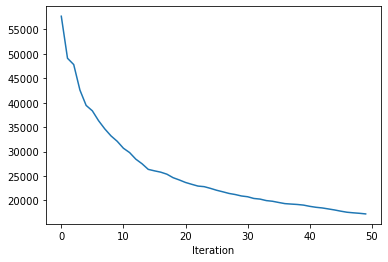

In [394]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pandas.io.json import json_normalize

qq= pd.DataFrame((json_normalize(model.get_evals_result()).loc[0].values)[0],index=[np.arange(1,51,1)]) .round(2)

plt.plot(qq.values)
plt.xlabel('Iteration')
plt.show()

In [362]:
rmse = pd.DataFrame({'GBM': pd.DataFrame(json_normalize(model.get_best_score())).loc[0].values, 'LM': mean_squared_error(y_test,model_lin.predict(X_test))**0.5},index=['RMSE'])
rmse

<ipython-input-362-10451478a67a>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  rmse = pd.DataFrame({'GBM': pd.DataFrame(json_normalize(model.get_best_score())).loc[0].values, 'LM': mean_squared_error(y_test,model_lin.predict(X_test))**0.5},index=['RMSE'])


,GBM,LM
RMSE,17252.91414,40995.610715


<AxesSubplot:>

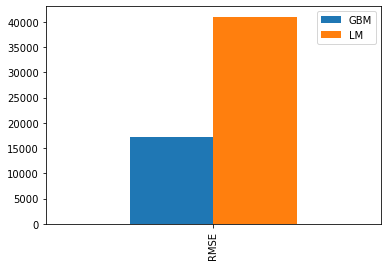

In [382]:
rmse.plot.bar()

For SalePrice prediction I will use GBM, beacause of lower RMSE than in Lm.

Importing and prepairing dataset for predicting

In [386]:
df_test = pd.read_csv('test.csv')

df_test = df_test.set_index(df_test['Id'])
del df_test['Id']

df_test['LotFrontage'] = df_test['LotFrontage'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('Other')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('No')
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode())
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode())
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].dropna()
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode())

df_test = df_test.fillna('None')

df_test = pd.get_dummies(data=df_test, drop_first=True)

Gradient Boosting model

In [389]:
model1 = CatBoostRegressor(iterations=50, 
                          depth=2, 
                          learning_rate=1,
                         loss_function='RMSE')

train_pool = Pool(X,Y)
#train the model
model1.fit(train_pool)

test_pool = Pool(df_test)

res = model1.predict(test_pool)

0:	learn: 54176.6089708	total: 2.74ms	remaining: 134ms
1:	learn: 48623.8523397	total: 7.16ms	remaining: 172ms
2:	learn: 45615.8043835	total: 9.02ms	remaining: 141ms
3:	learn: 41221.6447503	total: 11.1ms	remaining: 128ms
4:	learn: 38684.1190035	total: 13.1ms	remaining: 118ms
5:	learn: 36926.3064245	total: 24.8ms	remaining: 182ms
6:	learn: 34930.6791201	total: 27.8ms	remaining: 170ms
7:	learn: 33874.6173743	total: 42ms	remaining: 220ms
8:	learn: 32705.7297589	total: 45.6ms	remaining: 208ms
9:	learn: 32044.5719200	total: 49.5ms	remaining: 198ms
10:	learn: 30875.2399015	total: 53.9ms	remaining: 191ms
11:	learn: 30059.2320604	total: 56.1ms	remaining: 178ms
12:	learn: 29608.7211560	total: 58.9ms	remaining: 168ms
13:	learn: 28621.9050393	total: 62.7ms	remaining: 161ms
14:	learn: 27968.3614285	total: 71.6ms	remaining: 167ms
15:	learn: 27508.4052875	total: 76.3ms	remaining: 162ms
16:	learn: 27114.8486048	total: 79.8ms	remaining: 155ms
17:	learn: 26642.3394637	total: 82.6ms	remaining: 147ms
18:	

In [396]:
final_result = pd.DataFrame({'Id': df_test.index, 'SalePrice': res})

In [213]:
final_result.to_csv('prediction.csv',index=False)